# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing Data and librairies******

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#importing data 

dir = '/kaggle/input/crm-data-cleaned/CRM_Cleaned_Data_v1.xlsx'
course = pd.read_excel(dir)

****DATA EXPLORATION ****

In [2]:
course.head()


,Record ID,Are you a student/working professional?,Average Pageviews,Batch,Batch choice,City,College/University Name,Country/Region,Email Domain,IP City,...,Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Payment preference,Payment preference (v4),Payment timeline,Recent Conversion,Referral,Sends Since Last Engagement
0,6836601,Student,2,NaN,Nov 2023,Corrientes,NaN,Argentina,hotmail.com,corrientes,...,2,2,1,2,NaN,Monthly,12hrs,GATE training - Backend Development,Via LinkedIn,0
1,6835601,Student,0,NaN,Dec 2023,Veracruz,NaN,México,gmail.com,veracruz,...,1,0,1,1,NaN,One time,12hrs,GATE training - Backend Development,via Linkedin,0
2,6835001,Student,2,NaN,Nov 2023,Abu Dhabi,NaN,United Arab Emirates,gmail.com,abu dhabi,...,2,2,1,2,NaN,Monthly,12hrs,GATE training - IT,Linked in,1
3,6834501,Working Professional,2,NaN,Nov 2023; Dec 2023; Jan 2024; Feb 2024; Mar 2024,Lucknow,NaN,India,gmail.com,lucknow,...,2,2,1,2,NaN,One time ; Monthly,12hrs; 3-5 days,GATE training - IT,LinkedIn,1
4,6832101,Working Professional,2,Nov 2023; Dec 2023,NaN,Markopoulo Mesogaias,NaN,Greece,gmail.com,athens,...,2,2,1,2,Pay monthly,NaN,3-5 days,GATE Placement training - Talent Acquisition M...,No,0


In [3]:
#droping unecessary colums 
course.drop( columns =['Batch', 'Batch choice','Email Domain','IP State Code/Region Code','IP Country Code'])


,Record ID,Are you a student/working professional?,Average Pageviews,City,College/University Name,Country/Region,IP City,IP Country,IP State/Region,IP Timezone,...,Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Payment preference,Payment preference (v4),Payment timeline,Recent Conversion,Referral,Sends Since Last Engagement
0,6836601,Student,2,Corrientes,NaN,Argentina,corrientes,argentina,corrientes,america_slash_argentina_slash_cordoba,...,2,2,1,2,NaN,Monthly,12hrs,GATE training - Backend Development,Via LinkedIn,0
1,6835601,Student,0,Veracruz,NaN,México,veracruz,mexico,veracruz,america_slash_mexico_city,...,1,0,1,1,NaN,One time,12hrs,GATE training - Backend Development,via Linkedin,0
2,6835001,Student,2,Abu Dhabi,NaN,United Arab Emirates,abu dhabi,united arab emirates,abu dhabi,asia_slash_dubai,...,2,2,1,2,NaN,Monthly,12hrs,GATE training - IT,Linked in,1
3,6834501,Working Professional,2,Lucknow,NaN,India,lucknow,india,uttar pradesh,asia_slash_kolkata,...,2,2,1,2,NaN,One time ; Monthly,12hrs; 3-5 days,GATE training - IT,LinkedIn,1
4,6832101,Working Professional,2,Markopoulo Mesogaias,NaN,Greece,athens,greece,attiki,europe_slash_athens,...,2,2,1,2,Pay monthly,NaN,3-5 days,GATE Placement training - Talent Acquisition M...,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,675951,Working Professional,1,London,Richmond the American International University,NaN,NaN,united kingdom,NaN,europe_slash_london,...,1,1,1,1,Pay monthly -,NaN,NaN,GATE Placement training - Product Manager,LinkedIn,0
2599,672751,Student,0,Berlin,Unicersity of Law @ GISMA Business Berlin,NaN,nuremberg,germany,bayern,europe_slash_berlin,...,1,1,2,1,Pay in full,NaN,NaN,GATE Placement training - Talent Acquisition M...,Linkedin,0
2600,672401,Working Professional,1,Ikorodu,"Ajayi Crowther University, Oyo.",NaN,NaN,nigeria,anambra,africa_slash_lagos,...,1,1,1,1,Pay monthly -,NaN,NaN,GATE Placement training - Talent Acquisition M...,LinkedIn ads,1
2601,653651,Student,0,Germ,22,Germa,berlin,germany,berlin,europe_slash_berlin,...,3,1,3,3,Pay in full,NaN,48hrs,GATE Placement training - Product Manager V3,No,0


In [4]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Record ID                                2603 non-null   int64  
 1   Are you a student/working professional?  2603 non-null   object 
 2   Average Pageviews                        2603 non-null   int64  
 3   Batch                                    2129 non-null   object 
 4   Batch choice                             484 non-null    object 
 5   City                                     2603 non-null   object 
 6   College/University Name                  933 non-null    object 
 7   Country/Region                           2028 non-null   object 
 8   Email Domain                             2603 non-null   object 
 9   IP City                                  1848 non-null   object 
 10  IP Country                               2600 no

In [5]:
#Replacing NaN values by Mean
course.describe()

,Record ID,Average Pageviews,Marketing emails clicked,Marketing emails delivered,Marketing emails opened,Number of event completions,Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Sends Since Last Engagement
count,2.603000e+03,2603.000000,479.000000,2582.000000,2086.000000,2603.0,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,3.967231e+06,1.267384,1.323591,2.749032,2.220038,0.0,1.276604,1.942758,1.374568,1.212831,0.831348
std,1.849324e+06,0.817728,0.712770,1.030600,1.060745,0.0,0.624520,4.041506,1.627232,0.440150,1.234428
min,2.303510e+05,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.397151e+06,1.000000,1.000000,2.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000
50%,4.360651e+06,1.000000,1.000000,3.000000,2.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000
75%,5.426451e+06,2.000000,1.000000,3.000000,3.000000,0.0,1.000000,2.000000,1.000000,1.000000,1.000000
max,6.836601e+06,8.000000,6.000000,11.000000,11.000000,0.0,8.000000,147.000000,48.000000,4.000000,7.000000


In [6]:
course['Marketing emails clicked'].fillna(int(course['Marketing emails clicked'].mean()),inplace=True)
course['Marketing emails delivered'].fillna(int(course['Marketing emails delivered'].mean()),inplace=True)
course['Marketing emails opened'].fillna(int(course['Marketing emails opened'].mean()),inplace=True)

course1 =course.fillna(value='Not selected')
course1.head(10)

,Record ID,Are you a student/working professional?,Average Pageviews,Batch,Batch choice,City,College/University Name,Country/Region,Email Domain,IP City,...,Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Payment preference,Payment preference (v4),Payment timeline,Recent Conversion,Referral,Sends Since Last Engagement
0,6836601,Student,2,Not selected,Nov 2023,Corrientes,Not selected,Argentina,hotmail.com,corrientes,...,2,2,1,2,Not selected,Monthly,12hrs,GATE training - Backend Development,Via LinkedIn,0
1,6835601,Student,0,Not selected,Dec 2023,Veracruz,Not selected,México,gmail.com,veracruz,...,1,0,1,1,Not selected,One time,12hrs,GATE training - Backend Development,via Linkedin,0
2,6835001,Student,2,Not selected,Nov 2023,Abu Dhabi,Not selected,United Arab Emirates,gmail.com,abu dhabi,...,2,2,1,2,Not selected,Monthly,12hrs,GATE training - IT,Linked in,1
3,6834501,Working Professional,2,Not selected,Nov 2023; Dec 2023; Jan 2024; Feb 2024; Mar 2024,Lucknow,Not selected,India,gmail.com,lucknow,...,2,2,1,2,Not selected,One time ; Monthly,12hrs; 3-5 days,GATE training - IT,LinkedIn,1
4,6832101,Working Professional,2,Nov 2023; Dec 2023,Not selected,Markopoulo Mesogaias,Not selected,Greece,gmail.com,athens,...,2,2,1,2,Pay monthly,Not selected,3-5 days,GATE Placement training - Talent Acquisition M...,No,0
5,6403301,Working Professional,3,Not selected,Nov 2023,Yerevan,Not selected,Armenia,gmail.com,Not selected,...,3,7,2,2,Not selected,Monthly,3-5 days,GATE training - AI Product Management,Linkedin,0
6,6830251,Working Professional,2,Not selected,Nov 2023,Dublin,Not selected,ireland,icloud.com,dublin,...,2,2,1,2,Not selected,Monthly,3-5 days,GATE training - IT,insta,0
7,5707301,Working Professional,3,Oct 2023; Nov 2023,Not selected,Obrenovac,Not selected,Serbia,gmail.com,belgrade,...,3,7,2,2,Pay monthly,Not selected,12hrs,GATE Placement training - Data Analyst V4,LinkedIn,0
8,6829901,Working Professional,3,Not selected,Mar 2024,Tunisia,Not selected,Sousse,gmail.com,sousse,...,2,3,1,2,Not selected,Monthly,3-5 days,GATE training - Backend Development,linkedin,1
9,6829701,Other,2,Nov 2023; Dec 2023,Not selected,Riyadh,Not selected,Saudi Arabia,gmail.com,Not selected,...,2,2,1,2,Pay monthly,Not selected,3-5 days; 12hrs,GATE Placement training - Data Science V4,Rehab Albeladi,0


In [7]:
course1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Record ID                                2603 non-null   int64  
 1   Are you a student/working professional?  2603 non-null   object 
 2   Average Pageviews                        2603 non-null   int64  
 3   Batch                                    2603 non-null   object 
 4   Batch choice                             2603 non-null   object 
 5   City                                     2603 non-null   object 
 6   College/University Name                  2603 non-null   object 
 7   Country/Region                           2603 non-null   object 
 8   Email Domain                             2603 non-null   object 
 9   IP City                                  2603 non-null   object 
 10  IP Country                               2603 no

 ****SOME UNECESSARY COLUMN SUCH AS IP COUNTRY CODE , BATCH WERE REMOVED . 
 REPLACED NaN VALUES WITH MEAN FOR THE NUMERICAL VALUES . ****


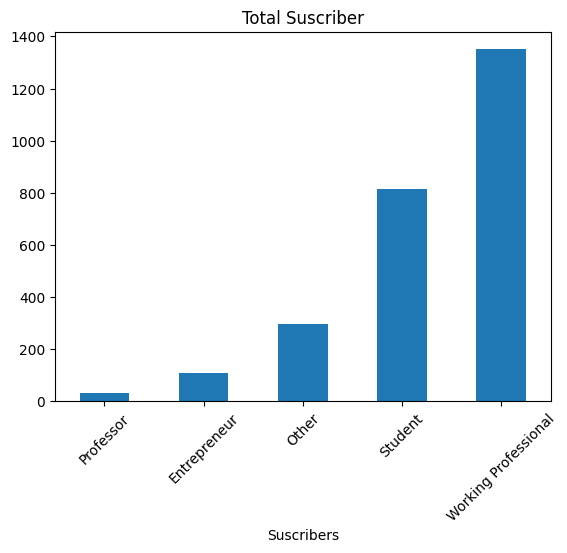

In [8]:
#lets rename some column in our datasets

course2 = course1.rename(columns={"Are you a student/working professional?":"Suscribers","Recent Conversion":"Courses"})

total_suscribers = course2.groupby('Suscribers')['Record ID'].nunique()
total_suscribers1 = total_suscribers.sort_values(ascending=True)

total_suscribers1.plot(kind='bar')
plt.title('Total Suscriber')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## **Working profesional has the highest number of students enrolled following by Student. from this insight we are curious to see in which kind of course the working professional and Student were enrolled **

In [9]:
courses = course2.groupby('Courses')['Record ID'].count()
courses


Courses
Backend - Step 1                                                       9
Blockchain - Step 1                                                    2
Data Analyst - Step 1                                                  1
Data Science - Step 1                                                  1
Digital Marketing - Step 1                                             1
GATE Ambassador                                                       16
GATE Apprenticeship  - Data Analytics                                  1
GATE Apprenticeship - TA Manager                                       1
GATE Placement training - Data Analyst V4                            282
GATE Placement training - Data Analytics                             239
GATE Placement training - Data Science & AI                          220
GATE Placement training - Data Science & AI - V3                       3
GATE Placement training - Data Science V4                            159
GATE Placement training - Digital Marketing

We can see that Course name are not homogene . let's find common name for course

In [10]:
course2['Courses'].replace(["Data Analyst - Step 1","GATE Apprenticeship  - Data Analytics","GATE Placement training - Data Analyst V4","GATE Placement training - Data Analytics","Oct batch - Data Analyst"] , "Data Analyst",inplace=True)

In [11]:
course2['Courses'].replace(["Data Science - Step 1","GATE Placement training - Data Science & AI","GATE Placement training - Data Science & AI - V3","GATE Placement training - Data Science V4","Oct batch - Data Scientist",] , "Data Science",inplace=True)

In [12]:
course2['Courses'].replace(["Digital Marketing - Step 1","GATE Placement training - Digital Marketing Manager","GATE Placement training - Digital Marketing Manager - V3","GATE Placement training - Digital Marketing Manager V4","Oct batch - Digital Marketing",] , "Digital Marketing",inplace=True)

In [13]:
course2['Courses'].replace(["Product - Step 1","GATE Placement training - Product Manager","GATE Placement training - Product Manager V2","GATE Placement training - Product Manager V3","GATE Placement training - Product Manager V4","Oct batch - Product",] , "Product Manager",inplace=True)

In [14]:
course2['Courses'].replace(["GATE Placement training - Sales & BD Manager (clone)","GATE Placement training - Sales & BD Manager V2","GATE Placement training - Sales & Business Development Manager V4"] , "Sales & Business", inplace=True)

In [15]:
course2['Courses'].replace(["GATE Apprenticeship - TA Manager","GATE Placement training - Talent Acquisition Manager","GATE Placement training - Talent Acquisition Manager V2","GATE training - Talent Acquisition Manager V3","GATE Placement training - Talent Acquisition Manager V4","Oct batch - TA","TA - Step 1"] , "Talent Acquisition", inplace=True)


In [16]:
course2['Courses'].replace(["Backend - Step 1","GATE training - Backend Development"], "Backend Development",inplace=True)

In [17]:
course2['Courses'].replace(["Blockchain - Step 1","GATE training - Blockchain"], "Blockchain",inplace=True)

In [18]:
course2['Courses'].replace(["IT - Step 1","GATE training - IT"], "IT",inplace=True)


In [19]:
course2['Courses'].replace(["GATE training - AI Product Management"], "AI Product Mgt",inplace=True)

In [20]:
course2['Courses'].replace(["GATE Ambassador","Winning the Best Talent - Moyyn: Moyyn Guide"] , "Other",inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

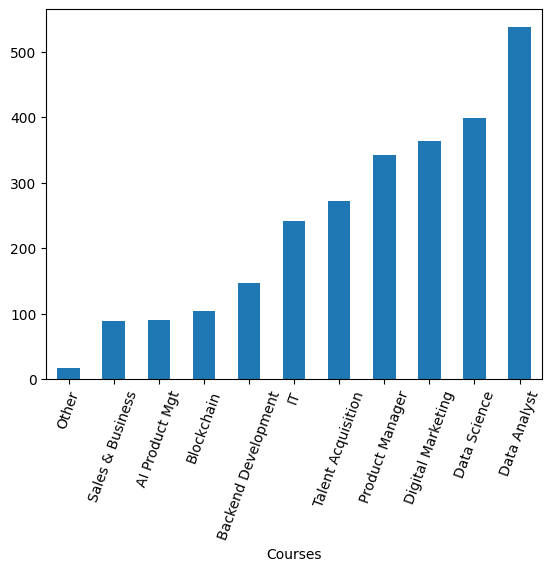

In [21]:
#
courses1 = course2.groupby('Courses')['Record ID'].count()
stats_courses = courses1.sort_values(ascending=True)
stats_courses.plot(kind='bar')
plt.xticks(rotation=70)
plt.show





# Insight from this visual is that : Data analyst has the highest number of susribers  . Data Science is following Data analyst But we would like to see what is the repartition between the suscribers and the courses enrolled

<Figure size 1500x800 with 0 Axes>

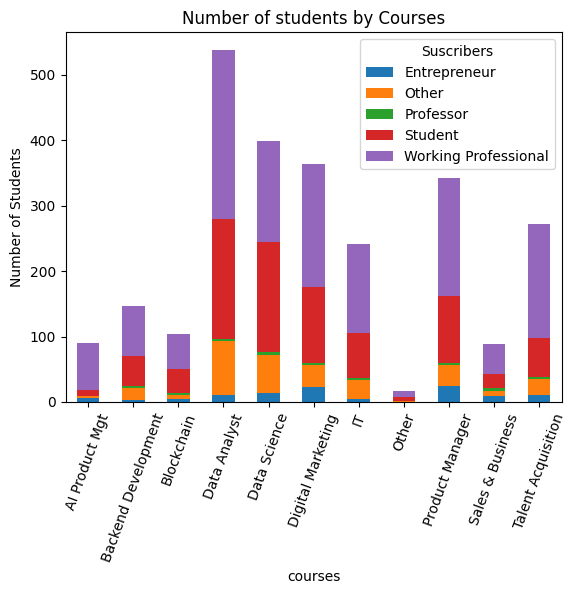

In [22]:
#students repartition

pivot_table = course2.pivot_table(index='Courses', columns='Suscribers', values='Record ID', aggfunc='count')

plt.figure(figsize=(15, 8))
pivot_table.plot.bar(stacked=True)
plt.title('Number of students by Courses')
plt.xlabel('courses')
plt.ylabel('Number of Students')
plt.legend(title='Suscribers')
plt.xticks(rotation=70)
plt.show()

# In Data Analyst course : We have the working professional and student who hve more than 80 % of the suscribers
# In Data Science : Students enrolled more than working professionals but again we can see that the majority of the suscribers still students and working professional




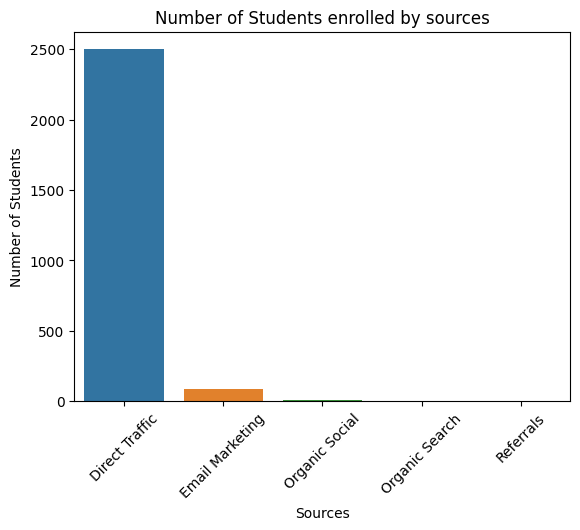

In [23]:
sns.countplot(data=course2, x='Latest Source')

# Customize the plot
plt.title('Number of Students enrolled by sources')
plt.xlabel('Sources')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Suscribers look for the platform directly to enrolled to their course as we can see in the graph above but we would like to know if they also received a marketing email before. 
# This is interesting as we we can conclude that Suscibers already knew what course they were looking for 

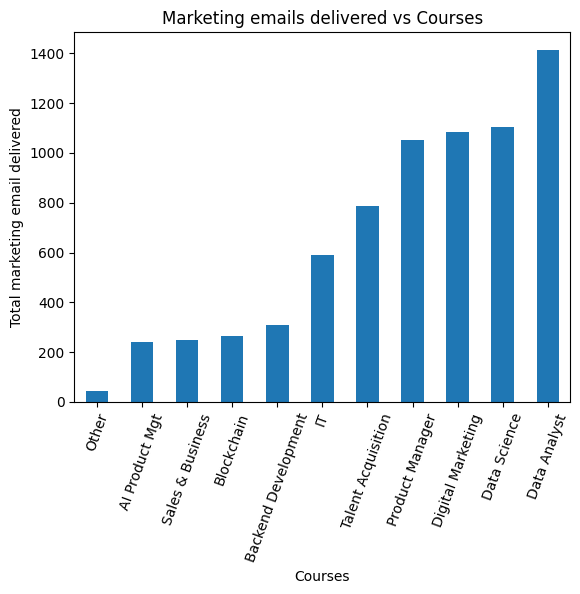

In [24]:
course2.groupby('Courses')['Marketing emails delivered'].sum().sort_values().plot(kind='bar')
plt.title('Marketing emails delivered vs Courses')
plt.xlabel('Courses')
plt.ylabel('Total marketing email delivered')
plt.xticks(rotation=70)
plt.show()

# More than 100 emails marketing was delivered for Data Analyst course and Data Science course . it is a good insight because now we know that suscribers received the email marketing and used the organic research to apply to the course

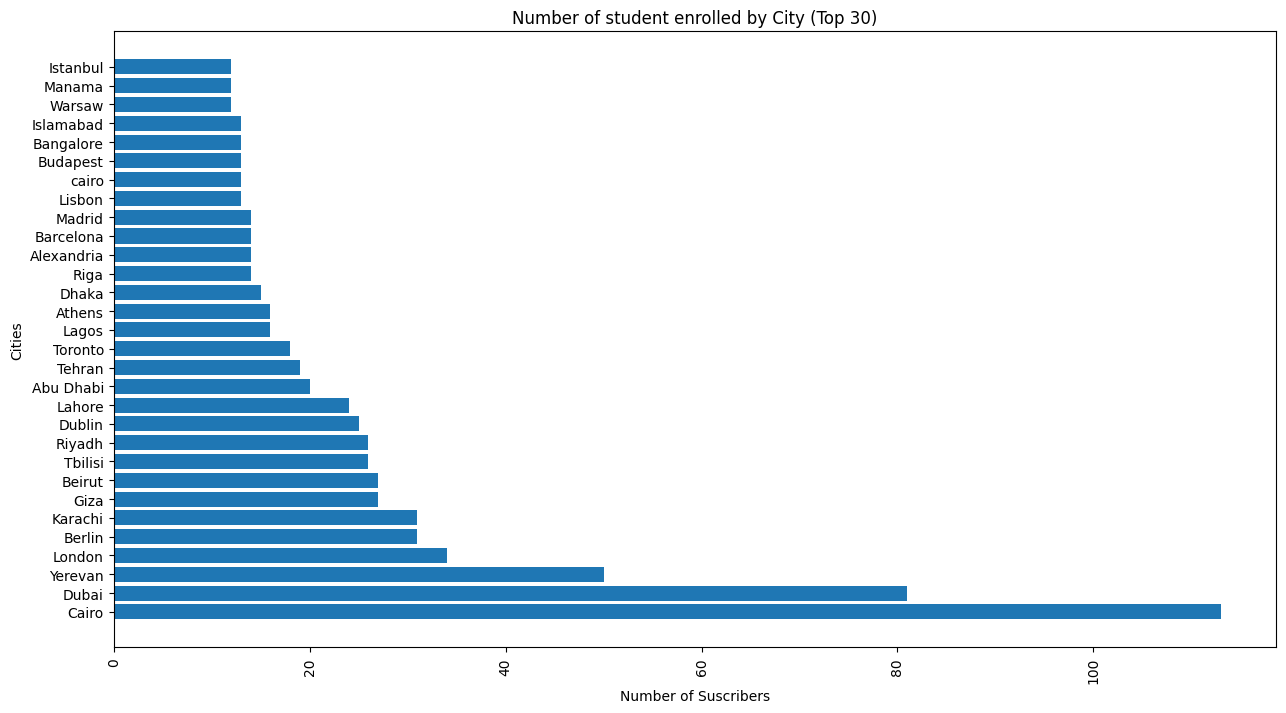

In [25]:
#lets calculate the number of suscribers by Cities .

suscribers_city = course2['Record ID'].groupby(course2['City']).count().reset_index()
count_suscribers_city = suscribers_city.sort_values(by='Record ID', ascending=False)

top15cities = count_suscribers_city.head(30)

plt.figure(figsize=(15,8))
plt.barh(top15cities['City'],top15cities['Record ID'])
plt.title('Number of student enrolled by City (Top 30)')
plt.xlabel('Number of Suscribers')
plt.ylabel('Cities')
plt.xticks(rotation=90)
plt.show()




# Most of the suscribers are from Cairo , Dubai and Yerevan . we will now see the repartion of the courses enrolled in this 3 cities .

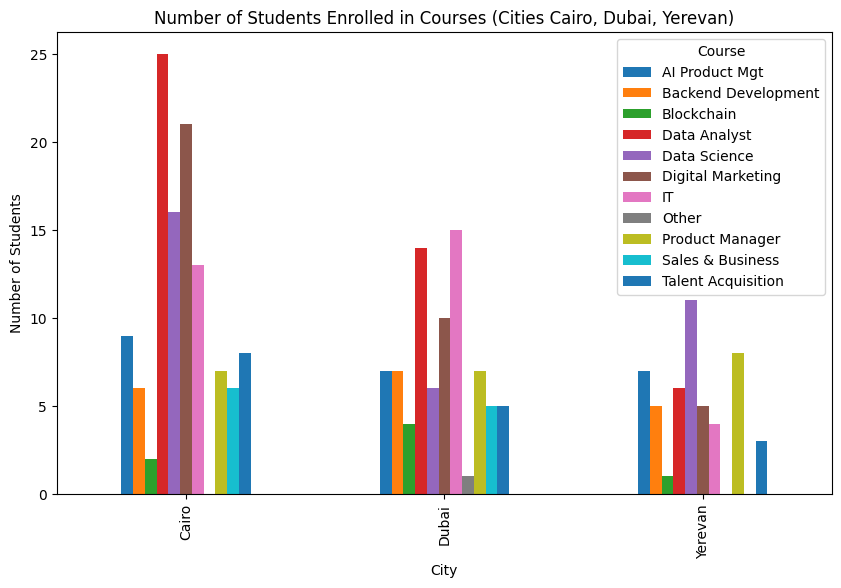

In [26]:
# Filter data for the three cities of interest
cities_of_interest = ['Cairo', 'Dubai', 'Yerevan']
filtered_data = course2[course2['City'].isin(cities_of_interest)]

# Group data by 'City' and 'Course' and count the number of students
grouped_data = filtered_data.groupby(['City', 'Courses'])['College/University Name'].count().unstack()

# Create a grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.title('Number of Students Enrolled in Courses (Cities Cairo, Dubai, Yerevan)')
plt.legend(title='Course', loc='upper right')

# Show the plot
plt.show()


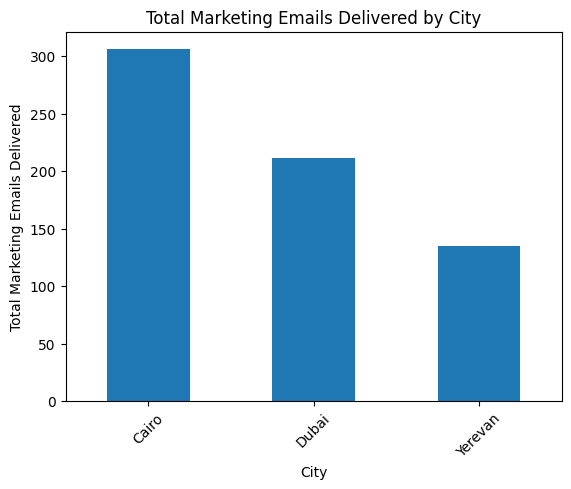

In [27]:
city_to_check = ['Cairo', 'Dubai', 'Yerevan']
f_city = course2[course2['City'].isin(city_to_check)]

# Group the filtered DataFrame 'f_city' by 'City' and sum the 'Marketing emails delivered' column
city_data = f_city.groupby('City')['Marketing emails delivered'].sum().sort_values(ascending=False)

# Create a bar plot
city_data.plot(kind='bar')
plt.title('Total Marketing Emails Delivered by City')
plt.xlabel('City')
plt.ylabel('Total Marketing Emails Delivered')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()